In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784', parser = 'auto')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
some_digit = x.to_numpy()[3600]
some_digit_image = some_digit.reshape(28, 28)

## Different types of colour map 

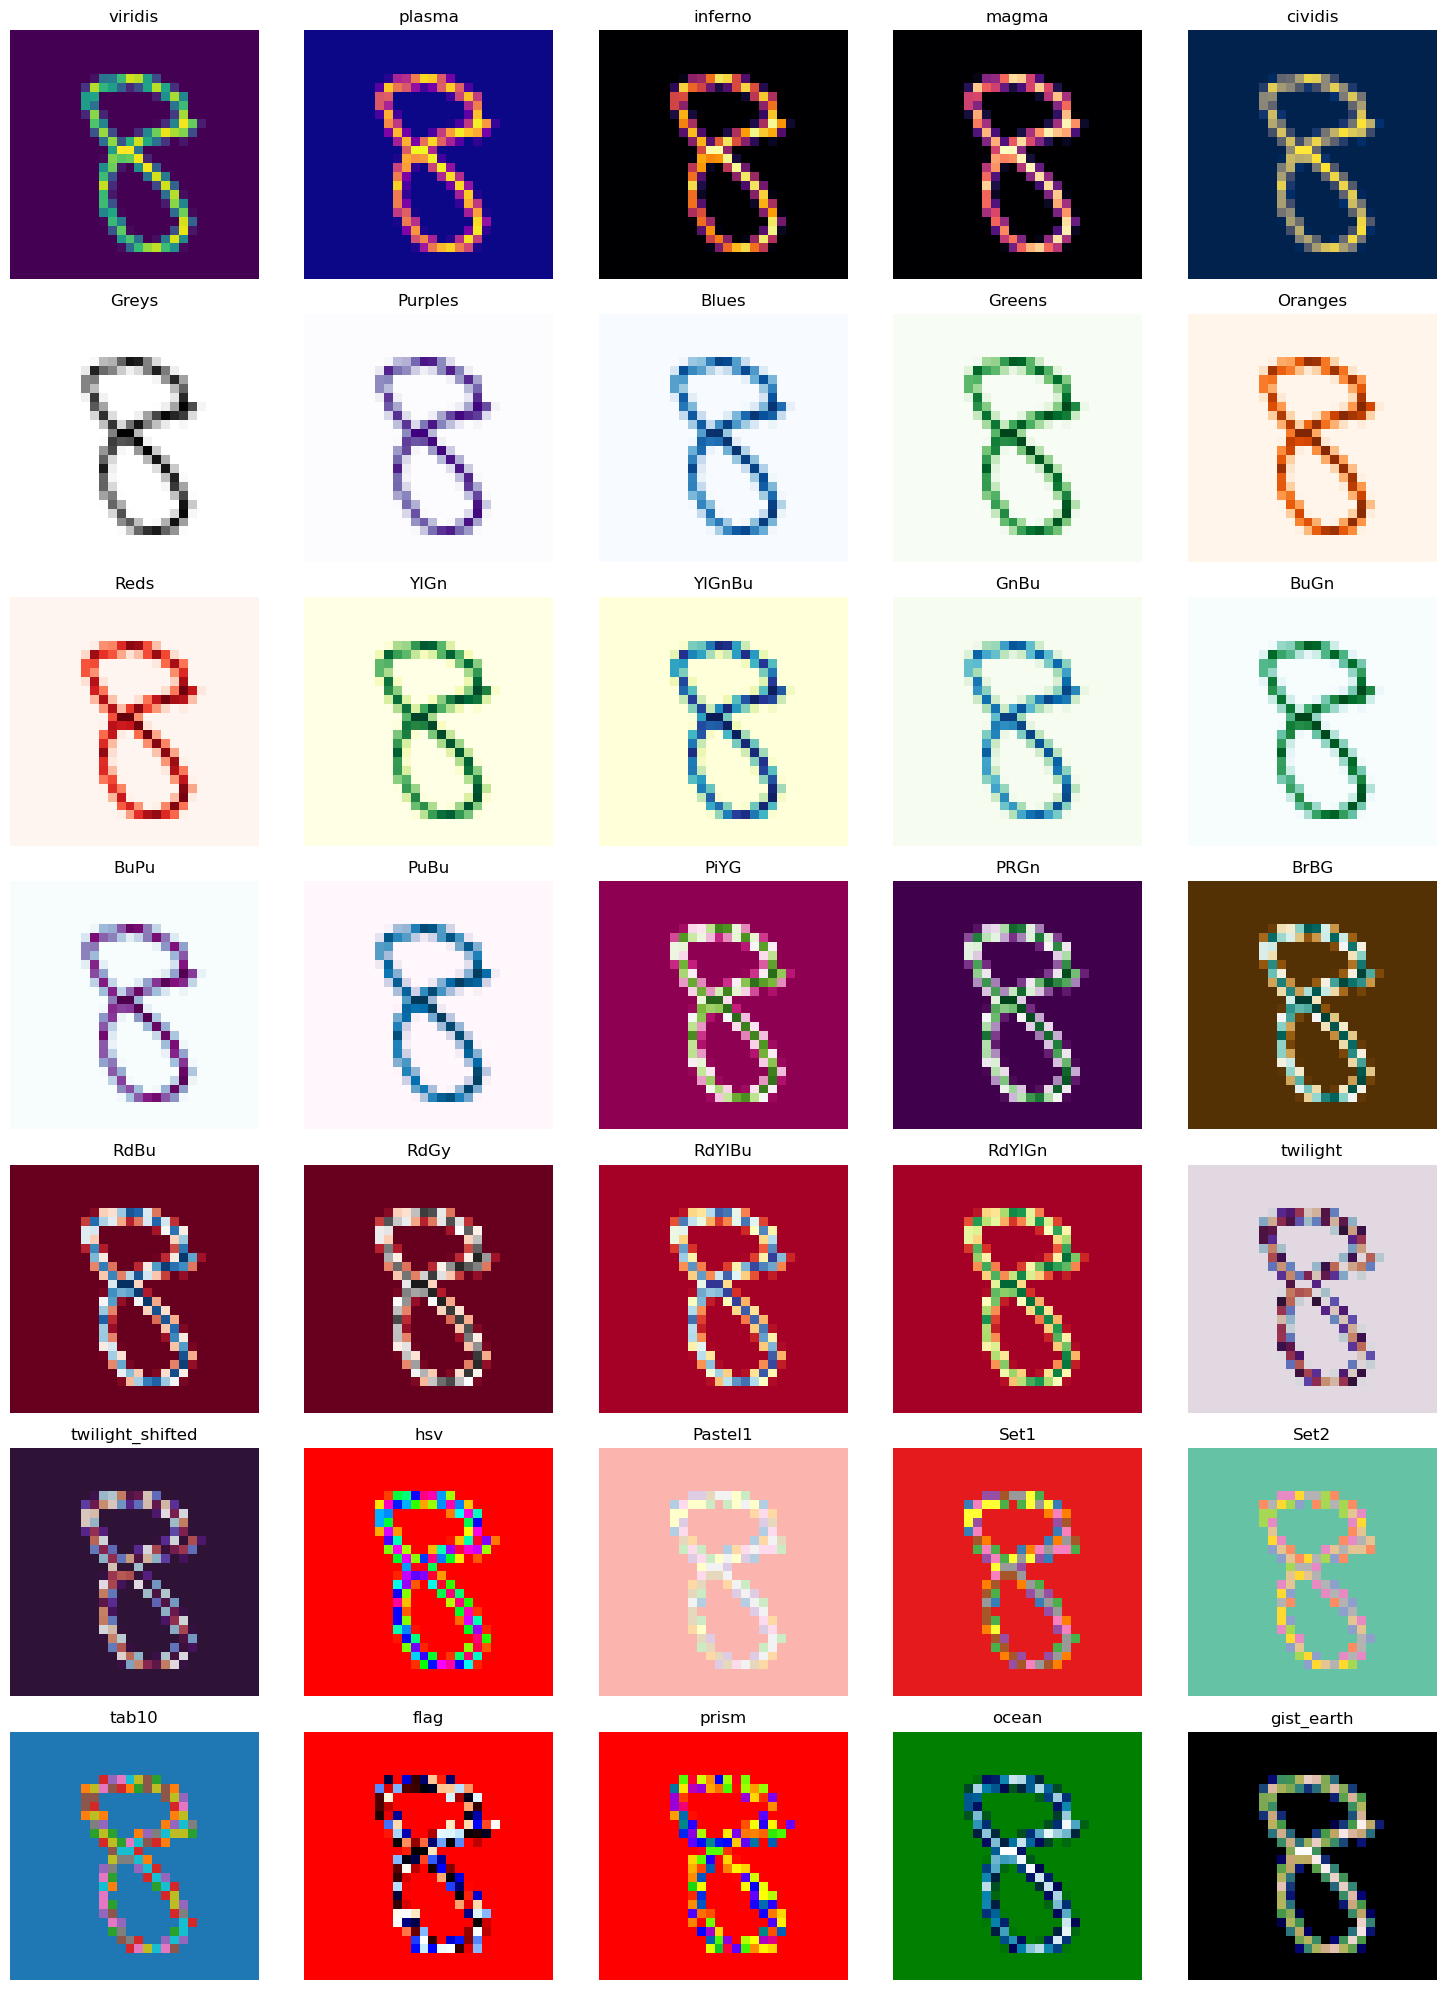

In [5]:
colormaps = [
    'viridis', 'plasma', 'inferno', 'magma', 'cividis',
    'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
    'YlGn', 'YlGnBu', 'GnBu', 'BuGn', 'BuPu', 'PuBu',
    'PiYG', 'PRGn', 'BrBG', 'RdBu', 'RdGy', 'RdYlBu', 'RdYlGn',
    'twilight', 'twilight_shifted', 'hsv',
    'Pastel1', 'Set1', 'Set2', 'tab10',
    'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gnuplot'
]

# Plot the image using different colormaps
fig, axes = plt.subplots(7, 5, figsize=(15, 20))
for ax, cmap in zip(axes.flat, colormaps):
    ax.imshow(some_digit_image, cmap=cmap, interpolation='nearest')
    ax.set_title(cmap)
    ax.axis('off')

plt.tight_layout()
plt.show()

## Different type of interpolation methods 

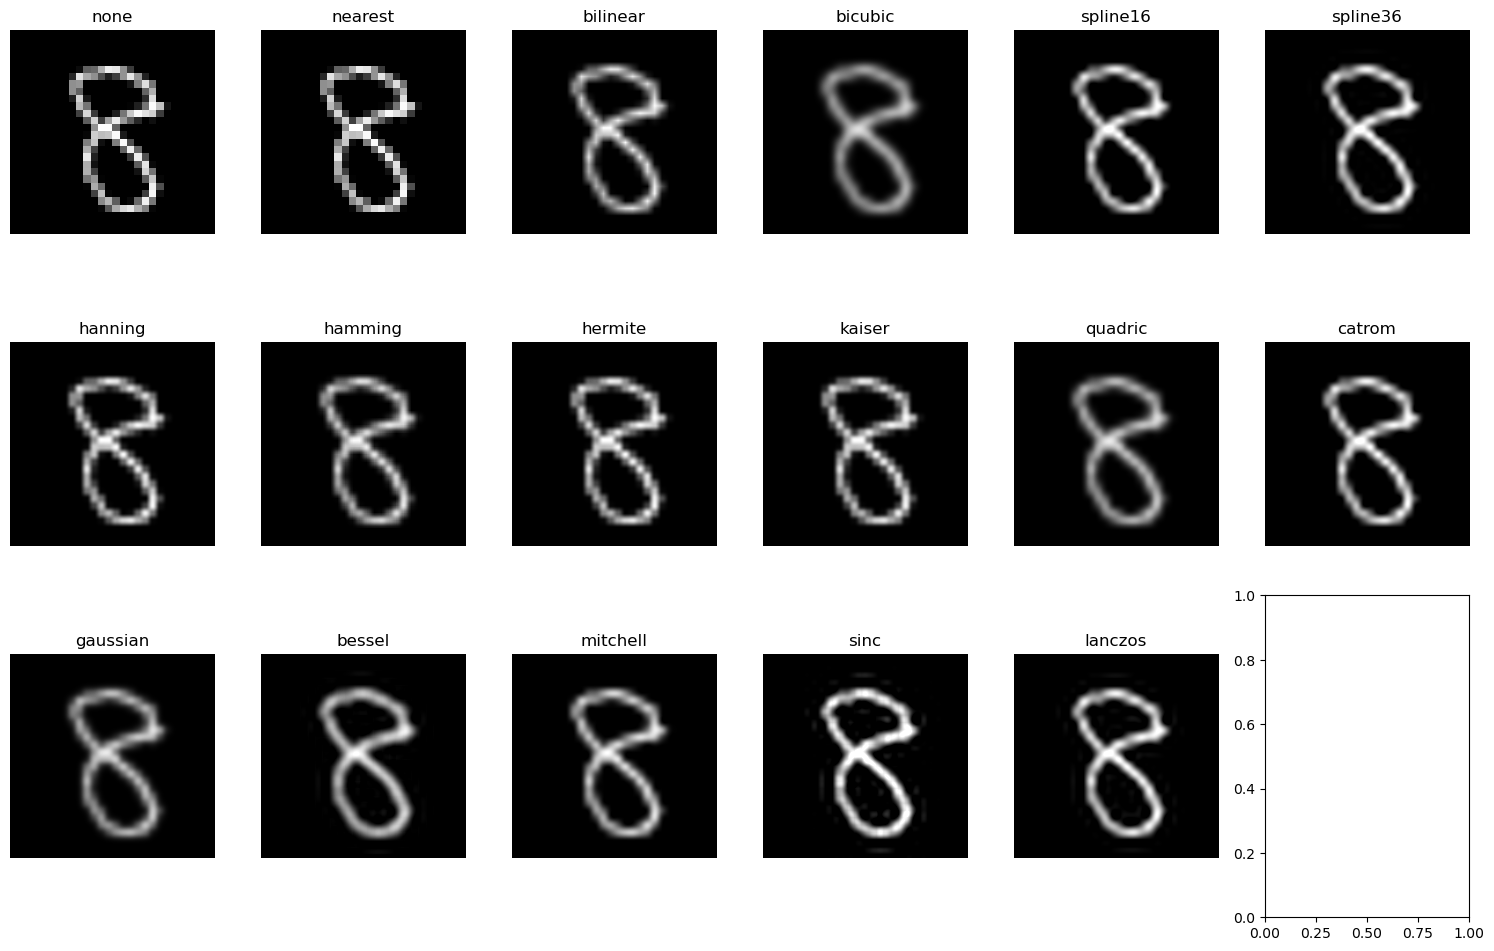

In [6]:
interpolation_methods = [
    'none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'spline36',
    'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom',
    'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos'
]

# Plot the image using different interpolation methods
fig, axes = plt.subplots(3, 6, figsize=(15, 10))
for ax, interp in zip(axes.flat, interpolation_methods):
    ax.imshow(some_digit_image, cmap='gray', interpolation=interp)
    ax.set_title(interp)
    ax.axis('off')

plt.tight_layout()
plt.show()

## MNIST Dataset is already splitted into training and testing data
First 60000 are training data and Next 10000 are testing data

In [8]:
x_train, x_test = x[:60000], x[60000:]
y_train, y_test = y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [9]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

## Training and Testing the model

In [10]:
clf = LogisticRegression(tol = 0.1, solver = 'liblinear',max_iter = 200)
clf.fit(x_train, y_train_2)
ex = clf.predict([some_digit])
print(ex)

[False]


C:\Users\disha\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Cross validation Method to check accuracy

In [11]:
z = cross_val_score(clf, x_train, y_train_2, cv = 2, scoring ="accuracy")
print(z.mean())

0.9777666666666667


In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, x_train, y_train_2, cv = 3)

In [17]:
y_train_pred

array([False, False, False, ..., False, False, False])

## Calculation confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_2, y_train_pred)

array([[53650,   392],
       [  935,  5023]], dtype=int64)

## Precision, Recall and F1-score

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train_2, y_train_pred)


0.9276084949215143

In [22]:
recall_score(y_train_2, y_train_pred)

0.8430681436723733

In [24]:
f1_score(y_train_2, y_train_pred)

0.8833201442011783

## Precision recall curve

In [31]:
y_score = cross_val_predict(clf, x_train, y_train_2, cv = 3, method ="decision_function")

In [32]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_score)

In [33]:
precisions

array([0.0993    , 0.09930166, 0.09930331, ..., 1.        , 1.        ,
       1.        ])

In [34]:
recalls

array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
       3.35683115e-04, 1.67841558e-04, 0.00000000e+00])

In [35]:
thresholds

array([-27.57700616, -26.40874419, -25.1211637 , ...,  13.12485401,
        14.25008291,  15.01503033])

## Precision and recall curve plotting

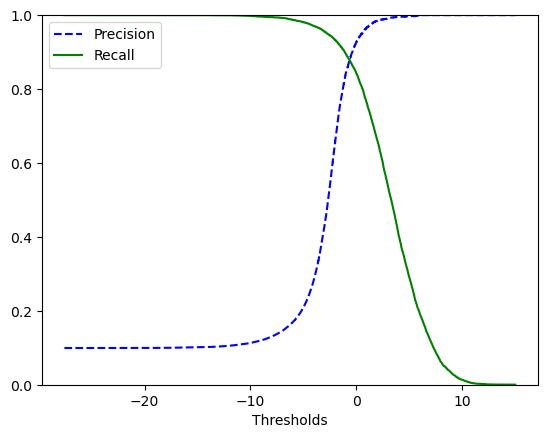

In [38]:
plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
plt.plot(thresholds, recalls[:-1], "g-", label = "Recall")
plt.xlabel("Thresholds")
plt.legend(loc = "upper left")
plt.ylim([0,1])
plt.show()
